> **Image Deepfake Testing** 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


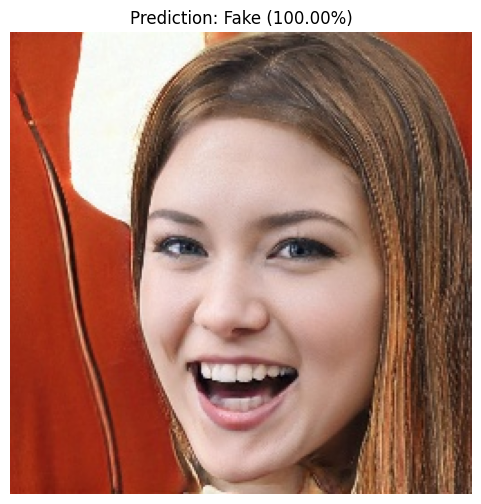

Predicted: Fake, Confidence: 100.00%


In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the model
model_path = "/kaggle/input/imagedetectormodel/tensorflow2/default/1/deepfake_image_detector.h5"
try:
    model = tf.keras.models.load_model(model_path)
except Exception as e:
    print(f"Model loading failed: {e}")
    model = None

def predict_image(image_path, model):
    try:
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0  # Normalize
        img_array = np.expand_dims(img_array, axis=0)  # Expand dims for batch size

        # Get prediction
        prediction = model.predict(img_array)[0][0]

        # Swapping labels to correct misclassification
        predicted_label = "Real" if prediction > 0.5 else "Fake"
        confidence = prediction * 100 if prediction > 0.5 else (1 - prediction) * 100

        # Display image with prediction
        img_cv = cv2.imread(image_path)
        img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(6, 6))
        plt.imshow(img_cv)
        plt.title(f"Prediction: {predicted_label} ({confidence:.2f}%)")
        plt.axis('off')
        plt.show()

        return predicted_label, confidence

    except Exception as e:
        print(f"Error: {e}")
        return None, None

# Run prediction only if model loads successfully
if model:    
    image_path = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/fake/00BYVMEI3I.jpg"
    predicted_label, confidence = predict_image(image_path, model)
    if predicted_label:
        print(f"Predicted: {predicted_label}, Confidence: {confidence:.2f}%")


> **Video Deepfake Testing**

Model loaded
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


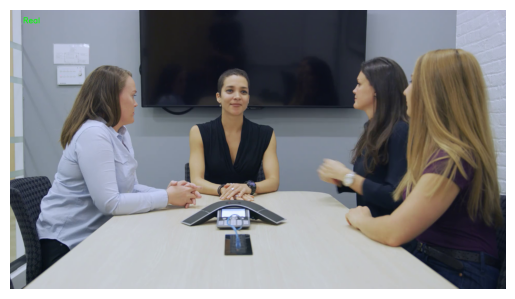

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


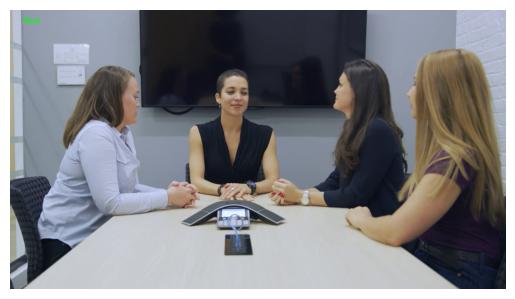

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


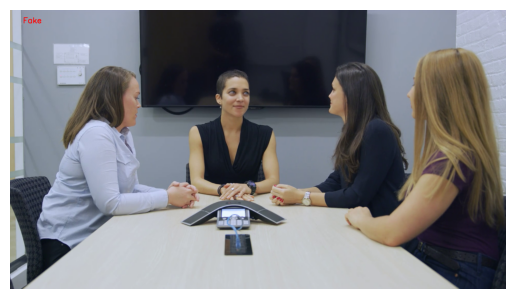

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


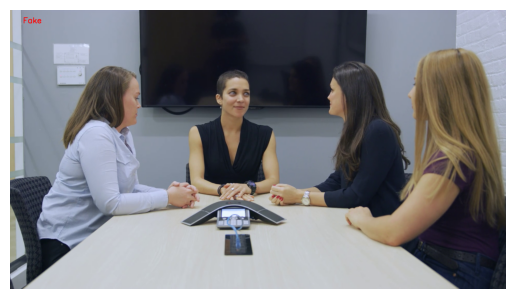

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


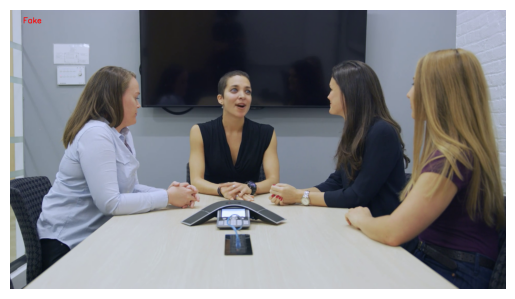

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


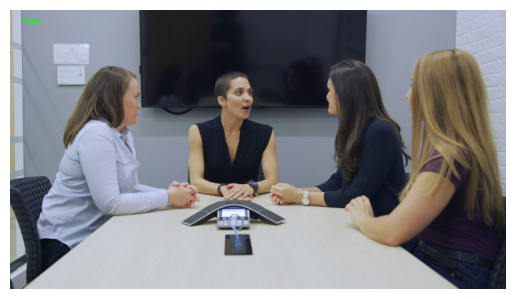

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("/kaggle/input/videodetectormodel/tensorflow2/default/1/xception_deepfake_model.h5")
print("Model loaded")
# Set image size
img_size = (299, 299)

# Function to detect deepfake in video frames
def predict_video_frames(video_path, model, frame_interval=10):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        if frame_count % frame_interval == 0:
            frame_resized = cv2.resize(frame, img_size)
            frame_normalized = frame_resized / 255.0
            frame_expanded = np.expand_dims(frame_normalized, axis=0)

            # Predict using the model
            prediction = model.predict(frame_expanded)[0][0]
            label = "Fake" if prediction > 0.5 else "Real"
            color = (0, 0, 255) if label == "Fake" else (0, 255, 0)  # Red for Fake, Green for Real

            # Draw label on frame
            cv2.putText(frame, label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

            # Convert frame to RGB for display
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

        frame_count += 1
    
    cap.release()
    cv2.destroyAllWindows()

# Example Usage
#/kaggle/input/deep-fake-detection-dfd-entire-original-dataset
video_path = "/kaggle/input/deep-fake-detection-dfd-entire-original-dataset/DFD_manipulated_sequences/DFD_manipulated_sequences/01_04__meeting_serious__0XUW13RW.mp4"
predict_video_frames(video_path, model)

> **Audio Deepfake Testing**

In [15]:
import numpy as np
import librosa
import cv2
import IPython.display as ipd  # For playing audio

# Function to preprocess the test audio file
def preprocess_audio(file_path, img_size=(128, 128)):
    y, sr = librosa.load(file_path, sr=22050)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    # Resize to match training input size
    mel_spec_resized = cv2.resize(mel_spec_db, img_size)
    
    # Reshape for model input (1 sample, height, width, 1 channel)
    mel_spec_resized = mel_spec_resized.reshape(1, img_size[0], img_size[1], 1)
    
    # Normalize
    mel_spec_resized = (mel_spec_resized - np.min(mel_spec_resized)) / (np.max(mel_spec_resized) - np.min(mel_spec_resized) + 1e-8)
    
    return mel_spec_resized, y, sr  # Also return audio for playback

# Function to play audio & predict
def predict_audio_with_playback(model, file_path):
    print(f"Playing: {file_path}")
    ipd.display(ipd.Audio(file_path))  # Play the audio

    # Preprocess audio
    processed_audio, y, sr = preprocess_audio(file_path)

    # Predict
    prediction = model.predict(processed_audio)[0][0]

    # Output result
    if prediction > 0.5:
        print(f"Prediction: 🟥 FAKE ({prediction:.2f})")
    else:
        print(f"Prediction: ✅ REAL ({prediction:.2f})")

# Example usage
test_audio_path = "/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/testing/fake/file1002.wav_16k.wav_norm.wav_mono.wav_silence.wav"  # Change path
# Load the trained model
model = load_model("/kaggle/input/audiodetectormodel/tensorflow2/default/1/audio.h5")
predict_audio_with_playback(model, test_audio_path)


Playing: /kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/testing/fake/file1002.wav_16k.wav_norm.wav_mono.wav_silence.wav


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Prediction: ✅ REAL (0.00)
